Street Suffix Visualisation with Python

Ever thought about how roads and streets are named where you live? How many are roads versus how many are streets? Is there a specific pattern to it where you live or is it just random? This post is going to go into how to visualise this using Python, and in particular `osmnx`.

![Street Suffix]({static img/street-suffix.png})

To understand what the terms are in the naming convention, here's an excerpt from a blog post over at: <https://360.here.com/2016/12/30/whats-the-difference-between-a-road-a-street-and-an-avenue/>

> So a 'road' is anything that connects two points, while 'streets' are public ways which have buildings on either side. Avenues, meanwhile, have the same attributes as streets but run perpendicular to them, while a boulevard is essentially a wide street (or avenue), with a median through the middle. A lane is, predictably, smaller.

Some of the fantastic resources used in creating this post are:

- <https://towardsdatascience.com/retrieving-openstreetmap-data-in-python-1777a4be45bb>
- <https://geopandas.org/reference.html#geodataframe>
- <https://osmnx.readthedocs.io/en/stable/index.html>

Let's get started, always beginning by importing the necessary packages. This environment was created using Anaconda, as setting up `GDAL` for Windows can be painful at the best of time, and Anaconda automates this process for us. This stackoverflow question also helped with setting up <https://stackoverflow.com/questions/59802791/installing-osmnx-with-anaconda>.

> Note that we set up the format for matplotlib as svg, as this will help out for our plots in this case. Svg is a file format which is a vector graphic. This means that everything in the 'image' is drawn mathematically allowing for 'infinite' resolution.

In [1]:
import osmnx as ox
ox.config(log_console=True, use_cache=True)
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import pandas as pd
import seaborn as sns
%matplotlib inline
set_matplotlib_formats('svg')
ox.__version__

'0.14.0'

`osmnx` allows us to access the plethora of data that is OpenStreetMap. OpenStreetMap is a map of the world, created by people like you and free to use under an open license. OpenStreetMap contains data on streets, buildings, elevations, terrain and more. `osmnx` can extract this data in a variety of methods, the main one we are interested in is the graph representation of the data (which is used for the streets). We extract the data for our area by providing an address, filter by the type of network ('drive' in this case) and providing a specific distance away from this address. We plot this data to see the extent of the extracted data.

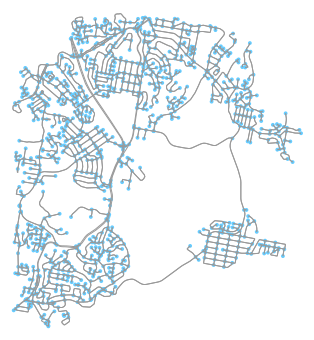

<Figure size 432x288 with 0 Axes>

In [2]:
address = "Beach Rd, Redhead NSW 2290, Australia"

graph = ox.graph_from_address(address,network_type='drive',dist=5000)

fig, ax = ox.plot_graph(graph)

plt.tight_layout()

Next we need to query & analyse this data, which `osmnx` conveniently provides us with a function to convert the extracted graph into a `GeoDataFrame`.

In [3]:
nodes, streets = ox.graph_to_gdfs(graph)

display(streets)

,u,v,key,osmid,highway,name,maxspeed,oneway,length,geometry,junction,lanes,ref,width,bridge,access
0,4812701696,4812701699,0,488979392,residential,Callemonda Close,50,False,89.588,"LINESTRING (151.68153 -33.01304, 151.68144 -33...",NaN,NaN,NaN,NaN,NaN,NaN
1,4812701699,1844333226,0,172707768,tertiary,Dalrymple Street,50,False,91.022,"LINESTRING (151.68130 -33.01380, 151.68228 -33...",NaN,NaN,NaN,NaN,NaN,NaN
2,4812701699,1844333215,0,172707768,tertiary,Dalrymple Street,50,False,162.463,"LINESTRING (151.68130 -33.01380, 151.68105 -33...",NaN,NaN,NaN,NaN,NaN,NaN
3,4812701699,4812701696,0,488979392,residential,Callemonda Close,50,False,89.588,"LINESTRING (151.68130 -33.01380, 151.68138 -33...",NaN,NaN,NaN,NaN,NaN,NaN
4,4812701700,4812701707,0,488979393,residential,Twin View Court,50,False,78.934,"LINESTRING (151.67519 -33.01230, 151.67523 -33...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,1847021562,1847021587,0,173954199,residential,Boldon Close,50,False,112.986,"LINESTRING (151.68051 -32.97493, 151.68038 -32...",NaN,NaN,NaN,NaN,NaN,NaN
2734,1847021565,1847021545,0,418259583,tertiary_link,Algona Road,60,False,131.581,"LINESTRING (151.69368 -32.97523, 151.69442 -32...",NaN,NaN,NaN,NaN,NaN,NaN
2735,1847021565,2157256210,0,254493907,residential,Lees Street,50,False,342.531,"LINESTRING (151.69368 -32.97523, 151.69353 -32...",NaN,NaN,NaN,NaN,NaN,NaN
2736,1847021565,1847021576,0,418259583,tertiary_link,Algona Road,60,False,37.266,"LINESTRING (151.69368 -32.97523, 151.69365 -32...",NaN,NaN,NaN,NaN,NaN,NaN


To query the dataset for the road type, we need to extract this from the roads name. For some roads in the dataset, multiple road names are provided so we just take the first in this case and drop all roads without a name. To get the last word in the road name, we split the string by spaces into a list and then take the last element in the list.

In [4]:
def get_road_type(street_name):
    if isinstance(street_name,list):
        street_name = street_name[0]
    return street_name.split()[-1]

streets = streets[streets['name'].notna()]

streets['street_type'] = streets['name'].apply(get_road_type)

display(streets)

,u,v,key,osmid,highway,name,maxspeed,oneway,length,geometry,junction,lanes,ref,width,bridge,access,street_type
0,4812701696,4812701699,0,488979392,residential,Callemonda Close,50,False,89.588,"LINESTRING (151.68153 -33.01304, 151.68144 -33...",NaN,NaN,NaN,NaN,NaN,NaN,Close
1,4812701699,1844333226,0,172707768,tertiary,Dalrymple Street,50,False,91.022,"LINESTRING (151.68130 -33.01380, 151.68228 -33...",NaN,NaN,NaN,NaN,NaN,NaN,Street
2,4812701699,1844333215,0,172707768,tertiary,Dalrymple Street,50,False,162.463,"LINESTRING (151.68130 -33.01380, 151.68105 -33...",NaN,NaN,NaN,NaN,NaN,NaN,Street
3,4812701699,4812701696,0,488979392,residential,Callemonda Close,50,False,89.588,"LINESTRING (151.68130 -33.01380, 151.68138 -33...",NaN,NaN,NaN,NaN,NaN,NaN,Close
4,4812701700,4812701707,0,488979393,residential,Twin View Court,50,False,78.934,"LINESTRING (151.67519 -33.01230, 151.67523 -33...",NaN,NaN,NaN,NaN,NaN,NaN,Court
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,1847021562,1847021587,0,173954199,residential,Boldon Close,50,False,112.986,"LINESTRING (151.68051 -32.97493, 151.68038 -32...",NaN,NaN,NaN,NaN,NaN,NaN,Close
2734,1847021565,1847021545,0,418259583,tertiary_link,Algona Road,60,False,131.581,"LINESTRING (151.69368 -32.97523, 151.69442 -32...",NaN,NaN,NaN,NaN,NaN,NaN,Road
2735,1847021565,2157256210,0,254493907,residential,Lees Street,50,False,342.531,"LINESTRING (151.69368 -32.97523, 151.69353 -32...",NaN,NaN,NaN,NaN,NaN,NaN,Street
2736,1847021565,1847021576,0,418259583,tertiary_link,Algona Road,60,False,37.266,"LINESTRING (151.69368 -32.97523, 151.69365 -32...",NaN,NaN,NaN,NaN,NaN,NaN,Road


Finally time to plot! Since the legend in this case can potentially be very large, we provide some specifics on locating the legend.

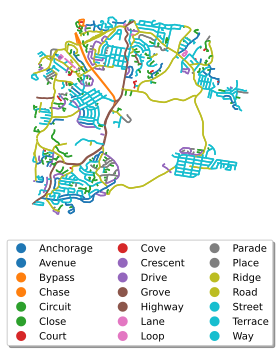

In [5]:
ax = streets.plot(column='street_type',legend=True,legend_kwds={'bbox_to_anchor':(0.5,-0.05),'shadow':True,'ncol':3,'loc':'upper center'})
ax.axis('off')
fig = ax.get_figure()
fig.savefig('street_type_map.svg',bbox_inches='tight')

Interestingly the connections between the suburbs and the main distributors within the suburbs are all roads. While all the networks inside the suburbs are streets, and the highways/bypass stand out well and truly.

Now let's find the distribution of types of streets in our dataset.

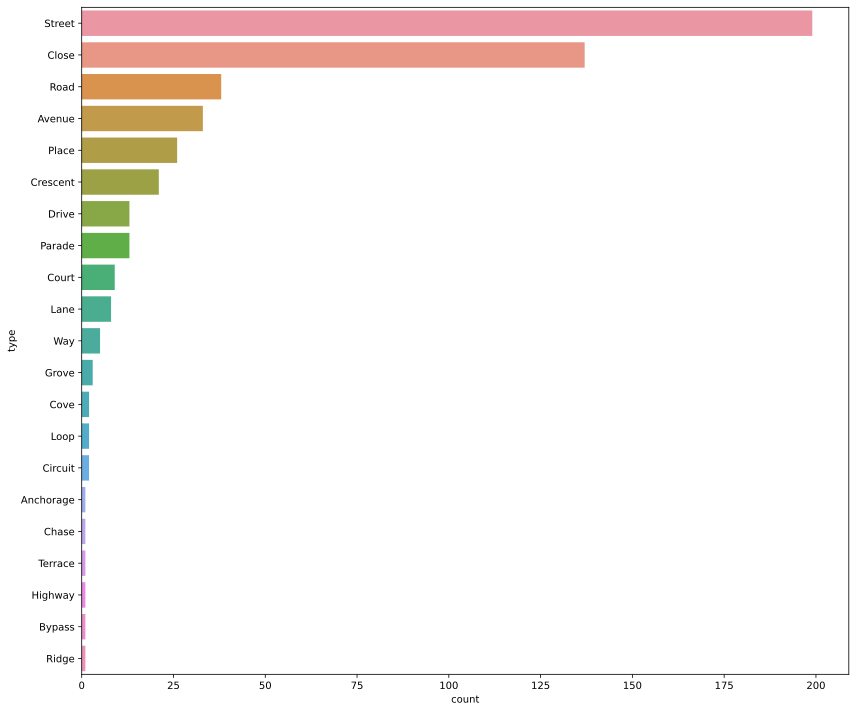

In [8]:
streets = streets.astype(str).drop_duplicates(['name'])
street_types = pd.DataFrame(streets["street_type"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
plt.savefig("street_type_bar_chart.svg")

There was a lot more 'closes' than I expected, but interesting nonetheless.

You can run this analysis yourself on wherever you'd like, change the address & distance and re-run this notebook!